$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°2 | Visualización y pre-procesamiento de datos}$$


_Integrantes:_

* _Giovanni Taco_

* _Francisco Ruiz_

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Analisis exploratorio de datos**

In [154]:
df = pd.read_csv("DIAGNOSTICOS_POR_GRUPOS_DE_EDAD.csv")
df.head()


,PERIODO_DIAGNOSTICO,ESTABLECIMIENTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES,GRUPOS_POR_EDAD,SEXO
0,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,INFECCIÓN POR SALMONELLA,OTRAS INFECCIONES DEBIDAS A SALMONELLA,1,DE 25 A 29 AÑOS,FEMENINO
1,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,OTRAS INFECCIONES INTESTINALES BACTERIANAS ESP...,OTRAS INFECCIONES INTESTINALES BACTERIANAS,1,MENORES DE 1 AÑO,FEMENINO
2,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,ABSCESO AMEBIANO DEL PULMÓN,AMEBIASIS,2,DE 60 A 64 AÑOS,MASCULINO
3,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,"AMEBIASIS, NO ESPECIFICADA",AMEBIASIS,1,DE 65 AÑOS A MÁS,MASCULINO
4,202301,HOSPITAL NACIONAL ARZOBISPO LOAYZA,LIMA,LIMA,LIMA,150101,20230615,GIARDIASIS [LAMBLIASIS],OTRAS ENFERMEDADES INTESTINALES DEBIDAS A PROT...,2,DE 5 A 9 AÑOS,FEMENINO


In [155]:
df.shape #Numero de filas y columnas

(6049, 12)

In [156]:
df.columns #Contenido de las columnas

Index(['PERIODO_DIAGNOSTICO', 'ESTABLECIMIENTO', 'DEPARTAMENTO', 'PROVINCIA',
       'DISTRITO', 'UBIGEO', 'FECHA_CORTE', 'DIAGNOSTICOS_CIE',
       'CATEGORIA_DIAGNOSTICO', 'TOTAL_PACIENTES', 'GRUPOS_POR_EDAD', 'SEXO'],
      dtype='object')

In [157]:
#De los datos observardos anteriormente, verificamos quienes tienen datos nulos
df.isnull().any()
#Los resultados se obtendran con "True" si algun elemento iterable es nulo

PERIODO_DIAGNOSTICO      False
ESTABLECIMIENTO          False
DEPARTAMENTO             False
PROVINCIA                False
DISTRITO                 False
UBIGEO                   False
FECHA_CORTE              False
DIAGNOSTICOS_CIE         False
CATEGORIA_DIAGNOSTICO    False
TOTAL_PACIENTES          False
GRUPOS_POR_EDAD          False
SEXO                     False
dtype: bool

In [158]:
#En vista que no se aprecian datos nulos realizamos una descripcion de la data
df.describe() 


,PERIODO_DIAGNOSTICO,UBIGEO,FECHA_CORTE,TOTAL_PACIENTES
count,6049.0,6049.0,6049.0,6049.000000
mean,202301.0,150101.0,20230615.0,2.610845
std,0.0,0.0,0.0,6.264612
min,202301.0,150101.0,20230615.0,1.000000
25%,202301.0,150101.0,20230615.0,1.000000
50%,202301.0,150101.0,20230615.0,1.000000
75%,202301.0,150101.0,20230615.0,2.000000
max,202301.0,150101.0,20230615.0,247.000000


Preprocesamiento

In [159]:
# Como se observan la mayoria de datos mostrados son pertenecientes a datos numeriso, mas no caracteriza ni considera
# datos cualitativos.
# Revisamos los valores unicos de nuestra data, para ello
# Recorremos la informacion segun la categoria y caracteristicas numericas
for col in df.columns:
  print(col, ":",df[col].nunique()) #Numero de valores unicos en un columna

PERIODO_DIAGNOSTICO : 1
ESTABLECIMIENTO : 1
DEPARTAMENTO : 1
PROVINCIA : 1
DISTRITO : 1
UBIGEO : 1
FECHA_CORTE : 1
DIAGNOSTICOS_CIE : 1769
CATEGORIA_DIAGNOSTICO : 840
TOTAL_PACIENTES : 50
GRUPOS_POR_EDAD : 15
SEXO : 2


In [160]:
# Ahora debemos revisar si es que existen datos repetidos
df.duplicated().sum()

0

In [161]:
# Analizando los valores previos, podemos observar que tenemos
# datos de importancia que diferencian un dato con respecto a otro, estas 2 categorias son
# DIAGNOSTICOS_CIE y CATEGORIA_DIAGNOSTICO, haciendo un pequeño analisis, consideramos que
# la primera categoria corresponde a un clasificacion de los datos segun un diagnostico especifico, por lo que 
# en la mayoria de casos se podria obtener varios datos con 1 solo diagnostico diferente al resto.
# En contraste con la segunda categoria puesto a que estas agrupan esos diagnosticos especificos.
df["SEXO"].unique() #Unique values en la columna "CATEGORIA_DIAGNOSTICO"


array(['FEMENINO', 'MASCULINO'], dtype=object)

In [162]:
df["SEXO"].unique()

array(['FEMENINO', 'MASCULINO'], dtype=object)

In [163]:
df["GRUPOS_POR_EDAD"].unique()

array(['DE 25 A 29 AÑOS', 'MENORES DE 1 AÑO', 'DE 60 A 64 AÑOS',
       'DE 65 AÑOS A MÁS', 'DE 5 A 9 AÑOS', 'DE 50 A 54 AÑOS',
       'DE 35 A 39 AÑOS', 'DE 1 A 4 AÑOS', 'DE 45 A 49 AÑOS',
       'DE 30 A 34 AÑOS', 'DE 20 A 24 AÑOS', 'DE 15 A 19 AÑOS',
       'DE 10 A 14 AÑOS', 'DE 55 A 59 AÑOS', 'DE 40 A 44 AÑOS'],
      dtype=object)

In [164]:
#Por lo anterior obsrevamos que existen valores nulos en nuestro array, para ello se purgará esos valores
df = df.dropna(subset=['CATEGORIA_DIAGNOSTICO'])
df.shape
#Con lo anterior nos cercioramos de que hemos eliminado los valores nulos de nuestra columna "target"

(6049, 12)

**Visualizacion de datos**

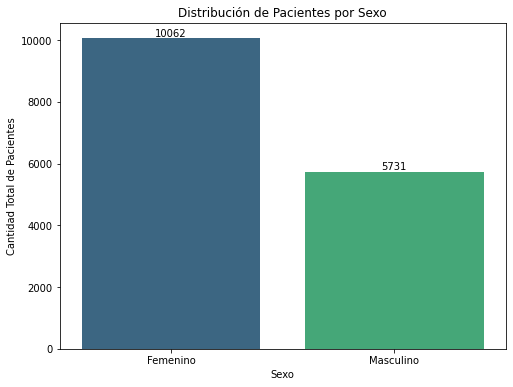

In [165]:
# En vista de que tenemos datos cualitativos, debemos traducirlos a datos cuantitativos
# Considerando solo los datos de sexo, se hace incluso complicado el poder analizarlo, debido a que secciona 
# y muestra los datos de manera segmentada.
# Por ello, para una visualizacion de los datos, debemos determinar cuantos pacientes hay en el archivo proporcionado
# y en base a ello ir filtrando, caracteristicas independientes que permitan visualizar los datos
Total_pacientes = df['TOTAL_PACIENTES'].sum()

# Ahora calculamos la cantidad de pacientes femeninos
total_pacientes_femeninos = df[df['SEXO'] == 'FEMENINO']['TOTAL_PACIENTES'].sum()

# La cantidad de pacientes masculinos
total_pacientes_masculinos = Total_pacientes - total_pacientes_femeninos

# Creamos un DataFrame para el gráfico de barras, dato a que es mejor mostrar el dato a modo de barras, ya que es la incurrencia de personas
# con sexo especifico a mostrar.
data = pd.DataFrame({'Sexo': ['Femenino', 'Masculino'], 'Cantidad': [total_pacientes_femeninos, total_pacientes_masculinos]})

# Grafica de barras para la cantidad total de pacientes por sexo
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Sexo', y='Cantidad', palette='viridis')
plt.title('Distribución de Pacientes por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad Total de Pacientes')
for bar in plt.gca().containers:
    label = [f"{int(h.get_height())}" for h in bar] #label: string literal of height of bar
    plt.bar_label(bar, labels=label, label_type='edge') #set plot bar parameters
plt.show()


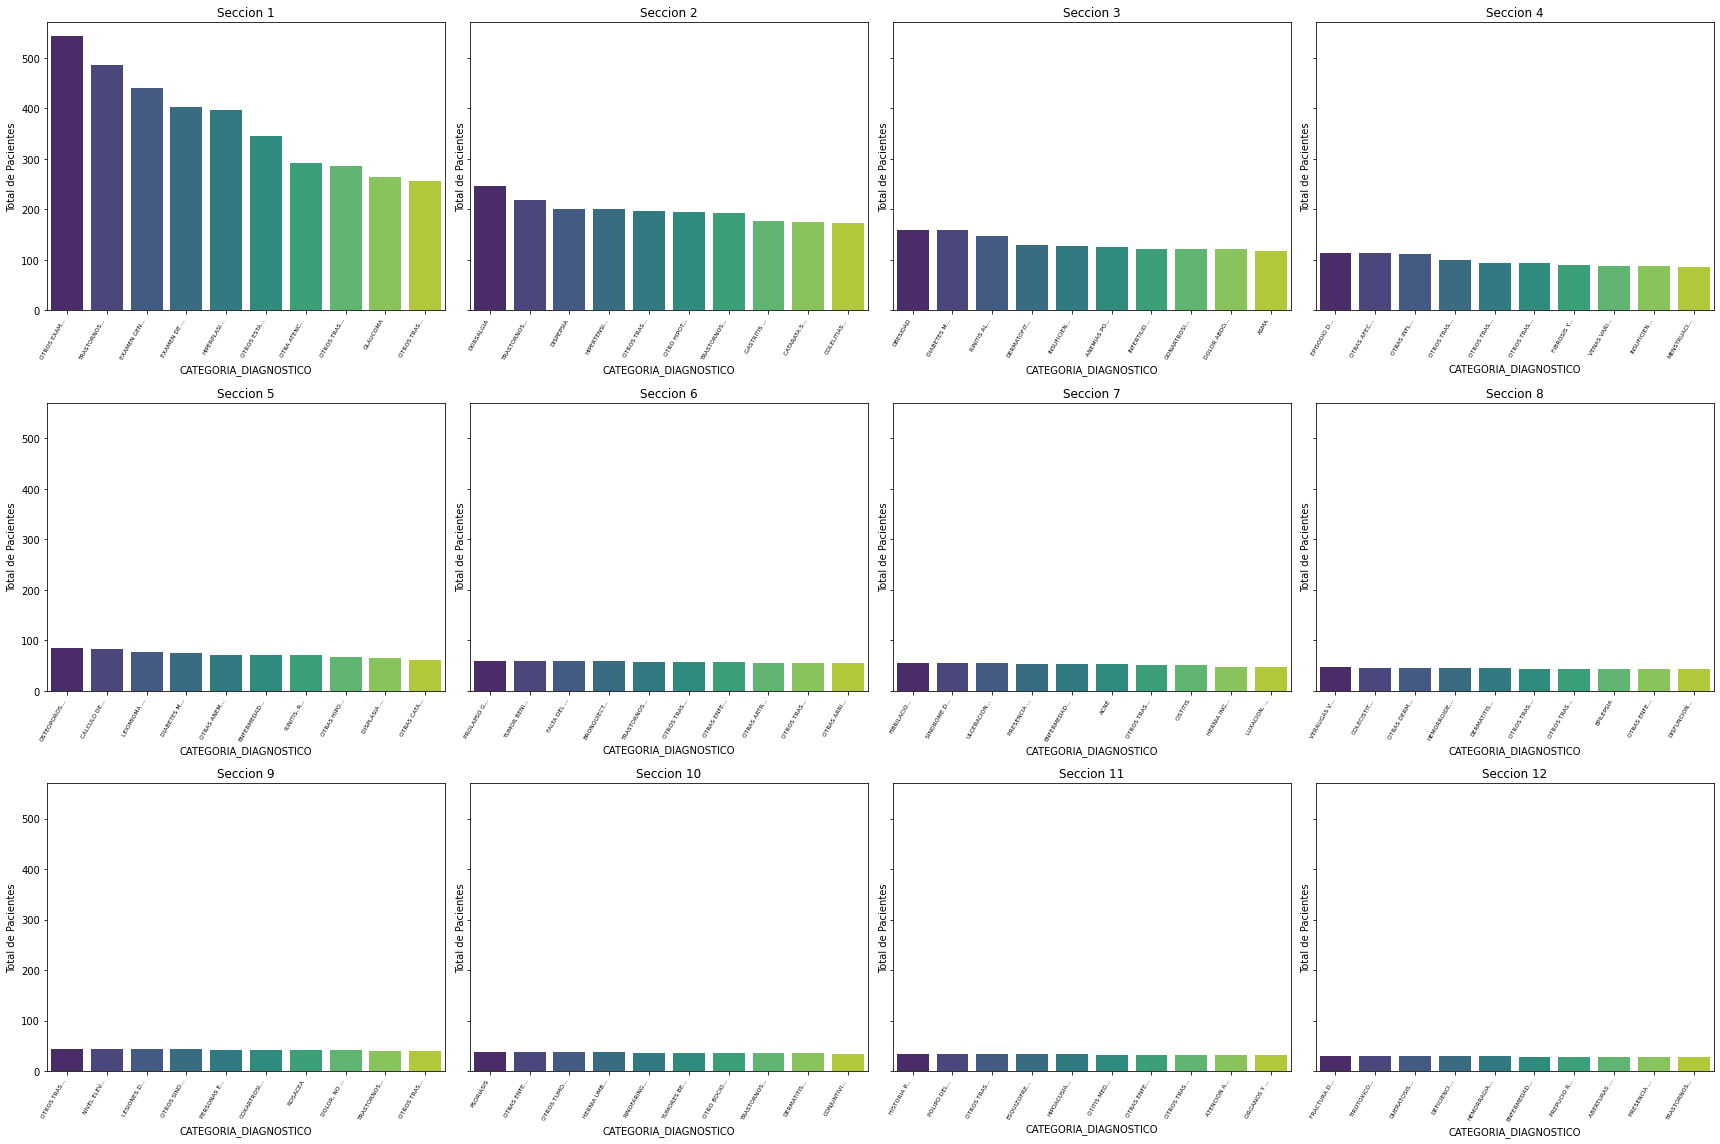

In [167]:

# Agrupamos nuestro target 'CATEGORIA_DIAGNOSTICO' y sumamos los valores de 'TOTAL_PACIENTES'
categoria_diagnostico_counts = df.groupby('CATEGORIA_DIAGNOSTICO')['TOTAL_PACIENTES'].sum().reset_index()

# Ordenamos los datos en orden descendente para una mejor visualización
categoria_diagnostico_counts = categoria_diagnostico_counts.sort_values(by='TOTAL_PACIENTES', ascending=False)

# Creamos una figura y ejes para los gráficos
fig, axes = plt.subplots(3,4, figsize=(24,16), sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Iterar sobre los subgráficos y los datos de categoría (para propositos de ploteo)
for i, ax in enumerate(axes.flat):
    if i < len(categoria_diagnostico_counts):
        data_subset = categoria_diagnostico_counts.iloc[i * 10:(i + 1) * 10]

        # Creamos un gráfico de barras para el subconjunto de categorías
        sns.barplot(data=data_subset, x='CATEGORIA_DIAGNOSTICO', y='TOTAL_PACIENTES', palette='viridis', ax=ax)
        ax.set_title(f'Seccion {i + 1}')
        ax.set_xlabel('CATEGORIA_DIAGNOSTICO')
        ax.set_ylabel('Total de Pacientes')
        
        # Truncar las etiquetas en el eje x debido a la cantidad exagerada de descripcion de los datos del archivo
        ax.set_xticklabels([label.get_text()[:10] + '...' if len(label.get_text()) > 10 else label.get_text() for label in ax.get_xticklabels()], rotation=60, ha='right', fontsize=6)  # Reducir el tamaño y rotar más

    else:
        # Si no hay datos para el subgráfico, se ocultan del ploteo
        ax.axis('off')

# Ajustamos la disposición de los subgráficos para evitar espacios vacíos
plt.tight_layout()
# Mostramos la figura
plt.show()

C:\Users\FRANCI~1\AppData\Local\Temp/ipykernel_34228/221004295.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([label.get_text()[:10] + '...' if len(label.get_text()) > 10 else label.get_text() for label in plt.gca().get_xticklabels()])


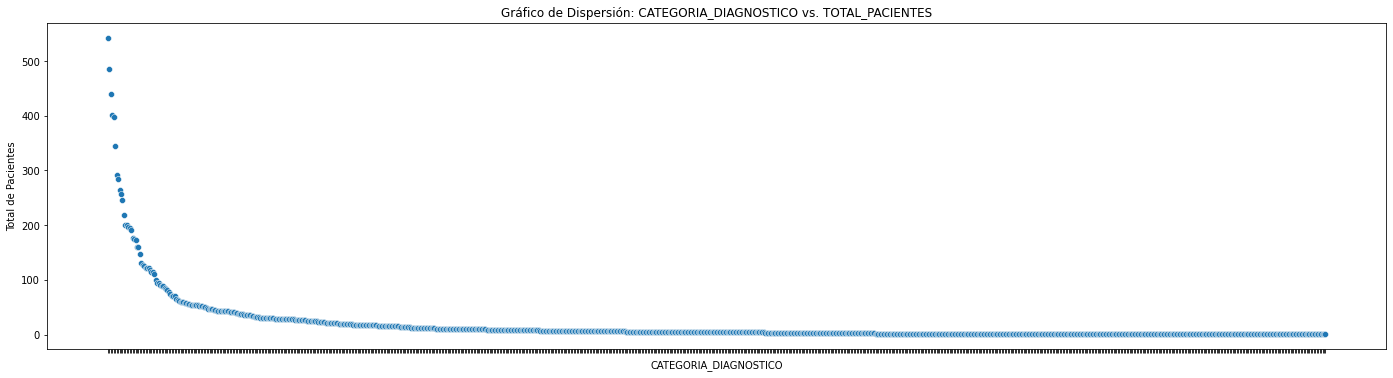

In [169]:
# Creamos un gráfico de dispersión
plt.figure(figsize=(24,6))
sns.scatterplot(data=categoria_diagnostico_counts, x='CATEGORIA_DIAGNOSTICO', y='TOTAL_PACIENTES')
plt.title('Gráfico de Dispersión: CATEGORIA_DIAGNOSTICO vs. TOTAL_PACIENTES')
plt.xlabel('CATEGORIA_DIAGNOSTICO')
plt.ylabel('Total de Pacientes')

# Truncamos las etiquetas en el eje x
plt.xticks(rotation=60, fontsize=6)
plt.gca().set_xticklabels([label.get_text()[:10] + '...' if len(label.get_text()) > 10 else label.get_text() for label in plt.gca().get_xticklabels()])

# Mostrar la figura
plt.show()

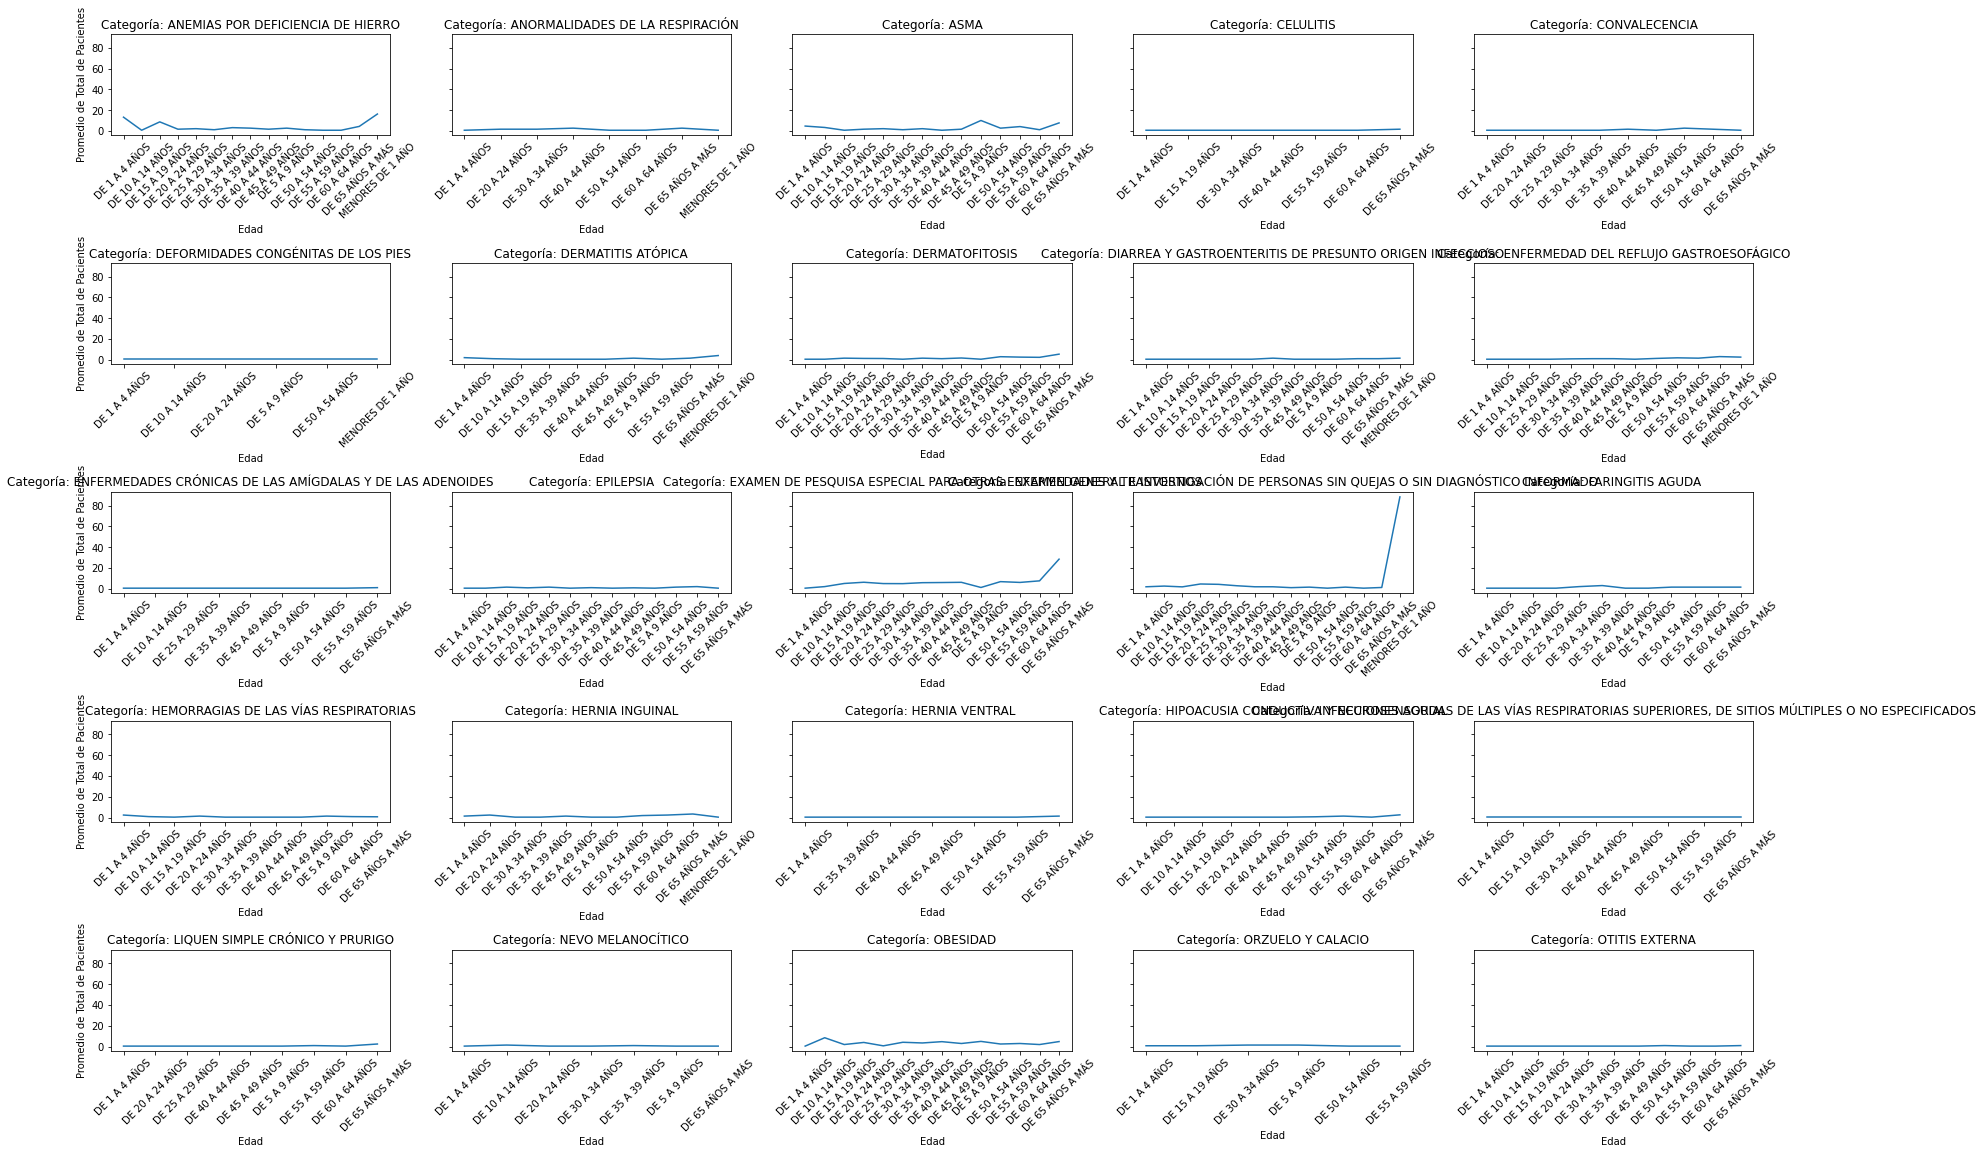

In [170]:
# Agrupamos por 'GRUPOS POR EDAD' y 'CATEGORIA_DIAGNOSTICO' y calculamos el promedio de 'TOTAL_PACIENTES'
mean_total_pacientes = df.groupby(['GRUPOS_POR_EDAD', 'CATEGORIA_DIAGNOSTICO'])['TOTAL_PACIENTES'].mean().reset_index()

# Luego obtenemos una lista de categorías que cumplan con la condición (6 o más grupos de edad), dado que durante el desarrollo
# se observaron datos donde solo existia un solo grupo de edad o eran muy pequeño y nada relevantes, por lo que se omiten esos
# grupos para mostrar los graficos.
# Para ello creamos una lista de categorias quienes van a cumplir esta condicion
categorias_validas = []
# Recorremos los valores que hay dentro de la columna CATEGORIA_DIAGNOSTICO
for categoria in mean_total_pacientes['CATEGORIA_DIAGNOSTICO'].unique():
    #Guardamos los valores
    data_subset = mean_total_pacientes[mean_total_pacientes['CATEGORIA_DIAGNOSTICO'] == categoria]
    #Si cumple nuestra condicion previamente establecida, entonces se concatenan a la lista de categorias validadas
    if len(data_subset['GRUPOS_POR_EDAD'].unique()) >= 6:
        categorias_validas.append(categoria)

# Calculamos el número de subgráficos necesarios (en este caso consideramos una matriz de 5x5)
num_subplots = len(categorias_validas)
num_rows = 5
num_cols = 5
num_empty_subplots = num_rows * num_cols - num_subplots

# Creamos una figura y ejes para los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 16), sharey=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Crear una lista de ejes vacíos, dado que durante el desarrollo se observo que al eliminar ciertos graficos, se observaban espacios en la figura
empty_axes = [ax for ax in axes.flat[-num_empty_subplots:]]

# Iteramos sobre los ejes y las categorías de diagnóstico para poder obtener informacion sobre cada grafico
for i, ax in enumerate(axes.flat):
    if i < num_subplots:
        #Recorremos las categorias quienes superaron nuestra condicion previa
        categoria = categorias_validas[i]
        data_subset = mean_total_pacientes[mean_total_pacientes['CATEGORIA_DIAGNOSTICO'] == categoria]

        # Creamos un gráfico de líneas para el subconjunto de categorías con su respectiva etiqueta
        sns.lineplot(data=data_subset, x='GRUPOS_POR_EDAD', y='TOTAL_PACIENTES', ax=ax)
        ax.set_title(f'Categoría: {categoria}')
        ax.set_xlabel('Edad')
        ax.set_ylabel('Promedio de Total de Pacientes')

        # Rotamos las etiquetas en el eje x para mejor legibilidad
        plt.setp(ax.get_xticklabels(), rotation=45)
    else:
        # Si no hay datos para el subgráfico, se ocultan y rellenamos con un gráfico vacío
        ax.axis('off')
        # Se crea un gráfico de líneas vacío
        sns.lineplot(x=[], y=[], ax=ax)

# Ajustamos la disposición de los subgráficos
plt.tight_layout()
# Mostramos la figura
plt.show()

In [171]:
#Realizamos LabelEncoding para trabajar con variables categoricas

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
    # Aplicar el LabelEncoder solo a las columnas con datos categóricos (tipo 'object')
        df[col] = encoder.fit_transform(df[col].values)
df.head()


,PERIODO_DIAGNOSTICO,ESTABLECIMIENTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_CORTE,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES,GRUPOS_POR_EDAD,SEXO
0,202301,0,0,0,0,150101,20230615,812,457,1,4,0
1,202301,0,0,0,0,150101,20230615,1080,459,1,14,0
2,202301,0,0,0,0,150101,20230615,4,22,2,12,1
3,202301,0,0,0,0,150101,20230615,35,22,1,13,1
4,202301,0,0,0,0,150101,20230615,634,443,2,9,0


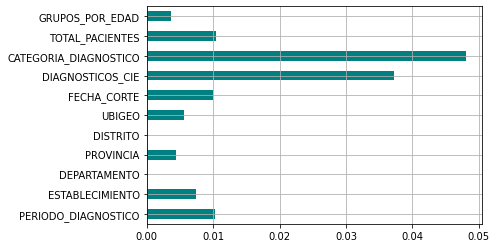

In [172]:
#Con respecto a la variable Target, realizamos uns busqueda de las variable que más se relacionan con ella
from sklearn.feature_selection import mutual_info_classif
plt.figure()
importances=mutual_info_classif(df.iloc[:,:-1],df.iloc[:,-1],discrete_features=False)
feat_importances=pd.Series(importances,df.columns[:-1])
feat_importances.plot(kind='barh',color='teal')
plt.grid()
plt.show()

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
x = df[["GRUPOS_POR_EDAD", "DIAGNOSTICOS_CIE", "CATEGORIA_DIAGNOSTICO", "TOTAL_PACIENTES"]]
y = df[['SEXO']]

In [174]:
df_new=pd.concat([pd.DataFrame(x,columns=["GRUPOS_POR_EDAD", "DIAGNOSTICOS_CIE", "CATEGORIA_DIAGNOSTICO", "TOTAL_PACIENTES"]),pd.DataFrame(y,columns=['SEXO'])],axis=1)
df_new


,GRUPOS_POR_EDAD,DIAGNOSTICOS_CIE,CATEGORIA_DIAGNOSTICO,TOTAL_PACIENTES,SEXO
0,4,812,457,1,0
1,14,1080,459,1,0
2,12,4,22,2,1
3,13,35,22,1,1
4,9,634,443,2,0
...,...,...,...,...,...
6044,10,1126,491,16,0
6045,8,1126,491,22,0
6046,7,1126,491,17,0
6047,6,1126,491,15,0


c:\Users\FRANCISCO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


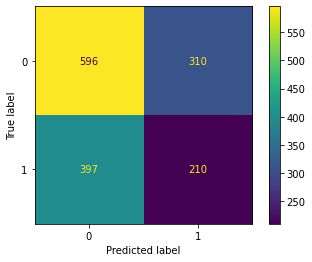

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=KNeighborsClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)


confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [176]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63       906
           1       0.40      0.35      0.37       607

    accuracy                           0.53      1513
   macro avg       0.50      0.50      0.50      1513
weighted avg       0.52      0.53      0.53      1513



c:\Users\FRANCISCO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


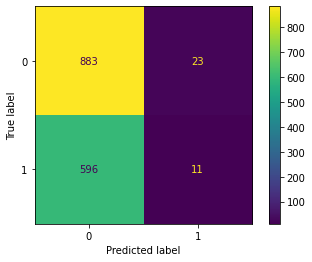

In [177]:
model=GaussianNB()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.97      0.74       906
           1       0.32      0.02      0.03       607

    accuracy                           0.59      1513
   macro avg       0.46      0.50      0.39      1513
weighted avg       0.49      0.59      0.46      1513



c:\Users\FRANCISCO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


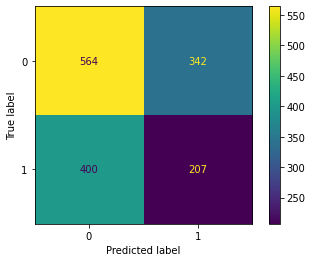

In [179]:
from sklearn.decomposition import PCA

pca = PCA(2)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

model=KNeighborsClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60       906
           1       0.38      0.34      0.36       607

    accuracy                           0.51      1513
   macro avg       0.48      0.48      0.48      1513
weighted avg       0.50      0.51      0.50      1513

